In [354]:
import matplotlib
import pandas as pd
import censusdata
import openpyxl
import re
import os
import numpy as np

import matplotlib.pyplot as plt
##### CHECK FOR UNUSED IMPORTS

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, train_test_split, validation_curve
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_confusion_matrix, precision_score, plot_roc_curve, make_scorer, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_absolute_error, mean_squared_error


from yellowbrick.classifier import ROCAUC

import seaborn as sns

import category_encoders as ce

In [8]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

In [9]:
censusdata.search('acs1', 2012, 'concept', 'race')

[('B01001F_001E', 'SEX BY AGE (SOME OTHER RACE ALONE)', 'Estimate!!Total'),
 ('B01001F_002E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male'),
 ('B01001F_003E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001F_004E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!5 to 9 years'),
 ('B01001F_005E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!10 to 14 years'),
 ('B01001F_006E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!15 to 17 years'),
 ('B01001F_007E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!18 and 19 years'),
 ('B01001F_008E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!20 to 24 years'),
 ('B01001F_009E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!25 to 29 years'),
 ('B01001F_010E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!30 to 34 years'),
 ('B01001F_011E',
  'SEX

In [10]:
censusdata.search('acs1', 2012, 'label', 'age')[0]

('B01002A_001E',
 'MEDIAN AGE BY SEX (WHITE ALONE)',
 'Estimate!!Median age!!Total')

In [11]:
censusdata.printtable(censusdata.censustable('acs1', 2012, 'B01001'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total                                        | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total Male                                | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total Male Under 5 years               | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total Male 5 to 9 years                | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total Male 10 to 14 years              | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total Male 15 to 17 years              | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total Male 18 and 19 years 

In [12]:
censusdata.printtable(censusdata.censustable('acs1', 2012, 'B01002A'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01002A_001E | MEDIAN AGE BY SEX (WHITE ALONE | !! !! Estimate Median age Total                          | float
B01002A_002E | MEDIAN AGE BY SEX (WHITE ALONE | !! !! Estimate Median age Male                           | float
B01002A_003E | MEDIAN AGE BY SEX (WHITE ALONE | !! !! Estimate Median age Female                         | float
-------------------------------------------------------------------------------------------------------------------


In [13]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs1', 2012)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [14]:
censusdata.geographies(censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(upper%20chamber)', '*')]), 'acs5', 2012)


{'State Senate District 40 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '040'))),
 'State Senate District 8 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '008'))),
 'State Senate District 39 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '039'))),
 'State Senate District 9 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '009'))),
 'State Senate District 10 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '010'))),
 'State Senate District 57 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '057'))),
 'State Senate District 58 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '058'))),
 'State Senate District 59 (2012), New York': censusgeo((('state', '36'), ('state leg

In [15]:
data = censusdata.download('acs5', 2012, censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(upper%20chamber)', '*')]), ['B01001_001E', 'B01001_002E', 'B01001_026E'])

In [16]:
data

,B01001_001E,B01001_002E,B01001_026E
"State Senate District 40 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):040",304418,150390,154028
"State Senate District 8 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):008",312213,150938,161275
"State Senate District 39 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):039",293597,145730,147867
"State Senate District 9 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):009",312806,151273,161533
"State Senate District 10 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):010",323789,151850,171939
...,...,...,...
"State Senate District 34 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):034",321252,157436,163816
"State Senate District 35 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):035",301542,145250,156292
"State Senate District 36 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):036",325191,146459,178732
"State Senate District 37 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):037",314509,151213,163296


In [17]:
values_to_grab = {'B01001001': "Total Pop",
                  'B01001002': "Male",
                  'B01001026': "Female",
                  'B02001002':"White alone",
                  'B02001003':"Black or African American alone",
                  'B02001004':"American Indian and Alaska Native alone",
                  'B02001005':"Asian alone",
                  'B02001006':"Native Hawaiian and Other Pacific Islander alone",
                  'B02001007':"Some other race alone",
                  'B02001008':"Two or more races:",
                  'B02001009':"Two races including Some other race",
                  'B02001010':"Two races excluding Some other race, and three or more races",
                  'B05001002':"U.S. citizen, born in the United States",
                  'B05001003':"U.S. citizen, born in Puerto Rico or U.S. Island Areas",
                  # Universe is limited to families with children
                  # 'B05010002':"Under poverty level",
                  # 'B05010010':"Between 1x and 1.99x poverty level",
                  # 'B05010018':"At least 2x poverty level",
                  "B06007002"	:"Speak only English",
                  "B06007003"	:"Speak Spanish",
                  "B06007006"	:"Speak other languages",
                  "B06008002"	:"Never married",
                  "B06008003"	:"Now married, except separated",
                  "B06008004"	:"Divorced",
                  "B06008005"	:"Separated",
                  "B06008006"	:"Widowed",
                  "B06009002"	:"Less than high school graduate",
                  "B06009003"	:"High school graduate (includes equivalency)",
                  "B06009004"	:"Some college or associate's degree",
                  "B06009005"	:"Bachelor's degree",
                  "B06009006"	:"Graduate or professional degree",
                  "B06010002"	:"No income",
                  "B06010004"	:"$1 to $9,999 or loss",
                  "B06010005"	:"$10,000 to $14,999",
                  "B06010006"	:"$15,000 to $24,999",
                  "B06010007"	:"$25,000 to $34,999",
                  "B06010008"	:"$35,000 to $49,999",
                  "B06010009"	:"$50,000 to $64,999",
                  "B06010010"	:"$65,000 to $74,999",
                  "B06010011"	:"$75,000 or more",
                  "B16004002"	:"5 to 17 years",
                  "B16004024"	:"18 to 64 years",
                  "B16004046"	:"65 years and over"








}

In [18]:
ny_senate_demo_data_2012 = censusdata.download('acs5', 2012, censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(upper%20chamber)', '*')]), [each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()])

In [19]:
ny_senate_demo_data_2012 = ny_senate_demo_data_2012.rename(columns=dict(zip([each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()], values_to_grab.values())))

ny_senate_demo_data_2012

,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
"State Senate District 40 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):040",304418,150390,154028,253024,15252,622,10588,27,17849,7056,...,14996,25047,21186,23325,20229,10449,62704,57746,188432,42036
"State Senate District 8 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):008",312213,150938,161275,227510,50463,934,9875,9,16133,7289,...,17663,27642,24005,29723,23567,11550,48856,55467,195262,43341
"State Senate District 39 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):039",293597,145730,147867,229963,29964,689,7720,20,18671,6570,...,18094,27908,22690,24429,21008,10466,35704,59077,180984,31151
"State Senate District 9 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):009",312806,151273,161533,232591,37889,644,18038,9,17437,6198,...,16376,26816,21828,27145,25529,11300,57567,55381,194032,47158
"State Senate District 10 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):010",323789,151850,171939,48425,169970,1496,40305,141,50220,13232,...,20006,33351,28865,31572,20248,7768,18488,61054,209064,32153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"State Senate District 34 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):034",321252,157436,163816,161872,48047,1058,22331,0,77737,10207,...,19058,29218,24044,31574,23043,9317,33237,48533,204034,49978
"State Senate District 35 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):035",301542,145250,156292,175189,57545,918,21284,66,36125,10415,...,17887,27945,22304,24275,18990,8756,48501,53054,186220,42745
"State Senate District 36 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):036",325191,146459,178732,47342,198884,1297,10095,48,57713,9812,...,20781,34816,29242,34730,21409,8217,16314,58280,204993,39735
"State Senate District 37 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):037",314509,151213,163296,239728,20967,402,17666,35,28430,7281,...,15862,25487,21038,24365,22245,10722,61741,55424,190926,49611


In [20]:
ny_senate_demo_data_2012 = ny_senate_demo_data_2012.reset_index(drop=False)

ny_senate_demo_data_2012

,index,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
0,"State Senate District 40 (2012), New York: Sum...",304418,150390,154028,253024,15252,622,10588,27,17849,...,14996,25047,21186,23325,20229,10449,62704,57746,188432,42036
1,"State Senate District 8 (2012), New York: Summ...",312213,150938,161275,227510,50463,934,9875,9,16133,...,17663,27642,24005,29723,23567,11550,48856,55467,195262,43341
2,"State Senate District 39 (2012), New York: Sum...",293597,145730,147867,229963,29964,689,7720,20,18671,...,18094,27908,22690,24429,21008,10466,35704,59077,180984,31151
3,"State Senate District 9 (2012), New York: Summ...",312806,151273,161533,232591,37889,644,18038,9,17437,...,16376,26816,21828,27145,25529,11300,57567,55381,194032,47158
4,"State Senate District 10 (2012), New York: Sum...",323789,151850,171939,48425,169970,1496,40305,141,50220,...,20006,33351,28865,31572,20248,7768,18488,61054,209064,32153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,"State Senate District 34 (2012), New York: Sum...",321252,157436,163816,161872,48047,1058,22331,0,77737,...,19058,29218,24044,31574,23043,9317,33237,48533,204034,49978
59,"State Senate District 35 (2012), New York: Sum...",301542,145250,156292,175189,57545,918,21284,66,36125,...,17887,27945,22304,24275,18990,8756,48501,53054,186220,42745
60,"State Senate District 36 (2012), New York: Sum...",325191,146459,178732,47342,198884,1297,10095,48,57713,...,20781,34816,29242,34730,21409,8217,16314,58280,204993,39735
61,"State Senate District 37 (2012), New York: Sum...",314509,151213,163296,239728,20967,402,17666,35,28430,...,15862,25487,21038,24365,22245,10722,61741,55424,190926,49611


In [21]:
# u for upper, l for lower
ny_senate_demo_data_2012['index'] = ny_senate_demo_data_2012['index'].apply(lambda x: 'u'+x.geo[1][1])
ny_senate_demo_data_2012 = ny_senate_demo_data_2012.rename(columns={'index': 'district'})
ny_senate_demo_data_2012

,district,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
0,u040,304418,150390,154028,253024,15252,622,10588,27,17849,...,14996,25047,21186,23325,20229,10449,62704,57746,188432,42036
1,u008,312213,150938,161275,227510,50463,934,9875,9,16133,...,17663,27642,24005,29723,23567,11550,48856,55467,195262,43341
2,u039,293597,145730,147867,229963,29964,689,7720,20,18671,...,18094,27908,22690,24429,21008,10466,35704,59077,180984,31151
3,u009,312806,151273,161533,232591,37889,644,18038,9,17437,...,16376,26816,21828,27145,25529,11300,57567,55381,194032,47158
4,u010,323789,151850,171939,48425,169970,1496,40305,141,50220,...,20006,33351,28865,31572,20248,7768,18488,61054,209064,32153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,u034,321252,157436,163816,161872,48047,1058,22331,0,77737,...,19058,29218,24044,31574,23043,9317,33237,48533,204034,49978
59,u035,301542,145250,156292,175189,57545,918,21284,66,36125,...,17887,27945,22304,24275,18990,8756,48501,53054,186220,42745
60,u036,325191,146459,178732,47342,198884,1297,10095,48,57713,...,20781,34816,29242,34730,21409,8217,16314,58280,204993,39735
61,u037,314509,151213,163296,239728,20967,402,17666,35,28430,...,15862,25487,21038,24365,22245,10722,61741,55424,190926,49611


Get all the required census data

In [22]:
census_data = pd.DataFrame()
# acs data doesn't exist for census years ie 2020
for year in [2012, 2014, 2016, 2018]:
    demo_data_senate = censusdata.download('acs5', year, censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(upper%20chamber)', '*')]), [each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()])
    demo_data_assembly = censusdata.download('acs5', year, censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(lower%20chamber)', '*')]), [each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()])
    
    demo_data_senate = demo_data_senate.rename(columns=dict(zip([each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()], values_to_grab.values())))
    demo_data_assembly = demo_data_assembly.rename(columns=dict(zip([each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()], values_to_grab.values())))
    
    demo_data_assembly = demo_data_assembly.reset_index(drop=False)
    demo_data_senate = demo_data_senate.reset_index(drop=False)
    
    demo_data_assembly['index'] = demo_data_assembly['index'].apply(lambda x: 'l'+x.geo[1][1])
    demo_data_assembly = demo_data_assembly.rename(columns={'index': 'district'})

    demo_data_senate['index'] = demo_data_senate['index'].apply(lambda x: 'u'+x.geo[1][1])
    demo_data_senate = demo_data_senate.rename(columns={'index': 'district'})
    
    demo_data_assembly['year'] = year
    demo_data_senate['year'] = year
    
    census_data = pd.concat([census_data, demo_data_assembly, demo_data_senate])

census_data

,district,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,"$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,year
0,l134,131534,63157,68377,118629,6482,300,2123,7,1886,...,15803,13897,16734,11775,4450,9640,21471,82456,20597,2012
1,l135,132025,63465,68560,123730,2534,94,3357,57,697,...,12630,11231,14188,11665,5490,17921,24352,78759,21820,2012
2,l064,124067,59521,64546,102746,3392,382,10947,76,4393,...,11927,9639,11586,9302,4343,17324,18874,79886,18525,2012
3,l065,128968,62745,66223,51937,6551,397,56030,62,10254,...,11237,8378,8673,8533,3967,21199,12008,92441,19082,2012
4,l058,129703,58039,71664,4714,118255,218,2188,8,2923,...,14523,12028,15282,9211,3499,7277,20507,84568,16437,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,u042,293926,148790,145136,229571,26549,1184,6375,79,17948,...,31773,24389,27791,21996,9559,36391,46191,184626,48645,2018
59,u043,296988,146472,150516,275265,7422,457,5732,25,2168,...,30855,27671,34086,28859,13318,43531,43670,183885,54912,2018
60,u044,293263,140757,152506,210092,44241,532,19138,133,5027,...,32384,25631,31014,25063,10704,34640,38835,194861,43880,2018
61,u045,298350,154072,144278,272849,10505,4315,2591,160,3585,...,35849,30558,33075,24747,10277,23274,41439,188516,54514,2018


# 2020 census data is stored completely differently - come back to later

https://www.census.gov/programs-surveys/acs/data/experimental-data/1-year.html

In [23]:
# dataset is too large to be loaded to github but can be found at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/3WZFK9

# harvard_data = pd.read_csv('196slers1967to2016_20180908.tab', delimiter='\t')

# ny_election_data = harvard_data[(harvard_data['sab'] == 'ny') & (harvard_data['year'] >= 2011)][['year', 'sab', 'ddez', 'sen', 'dname', 'dno', 'dtype', 'etype', 'cando', 'cand', 'party', 'prior1', 'prior2', 'exper', 'vote', 'outcome']]

In [24]:
harvard_data = pd.read_csv('harvard_data_2010+.csv', index_col=0)
harvard_data

/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,13,14,18,23,28,32,48,56,67,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,caseid,uncert,year,month,day,sid,sab,sfips,sicpsr,cname,...,ltype2b,namebsource,v38,v39,v56,v57,v58,v18_20171211,v19_20171211,v19_20160217
3257,294964,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294964.0,"BURDINE, GREG","BURDINE, GREG"
3258,294965,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2221.0,"HANSON, QUINTON","HANSON, QUINTON"
3259,294966,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294966.0,WRITEIN,WRITEIN
3260,294967,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270539.0,"CURTIS, MIKE","CURTIS, MIKE"
3261,294968,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3249.0,"GREER, LYNN","GREER, LYNN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378340,378228,NaN,2016,11.0,8.0,50,wy,56,68,natrona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321320.0,"ANDERSON, JAMES LEE",NaN
378341,378230,NaN,2016,11.0,8.0,50,wy,56,68,natrona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378230.0,SCATTERING,NaN
378342,378223,NaN,2016,11.0,8.0,50,wy,56,68,natrona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378223.0,"FORD, ROBERT",NaN
378343,378225,NaN,2016,11.0,8.0,50,wy,56,68,natrona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256633.0,"SCOTT, CHARLES K.",NaN


In [25]:
ny_election_data = harvard_data[(harvard_data['sab'] == 'ny') & (harvard_data['year'] >= 2011)][['year', 'sab', 'ddez', 'sen', 'dname', 'dno', 'dtype', 'etype', 'cando', 'cand', 'party', 'prior1', 'prior2', 'exper', 'vote', 'outcome']]

In [26]:
ny_election_data['prior1'].value_counts()

Series([], Name: prior1, dtype: int64)

In [27]:
ny_election_data['prior2'].value_counts()

Series([], Name: prior2, dtype: int64)

In [28]:
ny_election_data['cand'].value_counts()

scattering                362
seward, james l.           69
lopez, peter d.            55
amedore, george a. jr.     51
little, elizabeth o.       42
                         ... 
meyer, mindy                1
langdon, andrew p.          1
koon, david r.              1
burke, richard e.           1
sweeney, michael j.         1
Name: cand, Length: 770, dtype: int64

In [29]:
ny_election_data['etype'].value_counts()

g                4248
dp                245
rp                181
conservativep     151
indepp            144
workp             136
greenp              5
Name: etype, dtype: int64

In [30]:
ny_election_data['dtype'].value_counts()

1.0    5110
Name: dtype, dtype: int64

In [31]:
ny_election_data['dname'].value_counts()

Series([], Name: dname, dtype: int64)

Prior columns are useless for this segment of data though incumbency (expr column) is going to be a huge indicator obviously. For this research I'm going to limit to general elections. Then I'm going to need to combine candidates due to NY's fusion voting system.

In [32]:
ny_election_data = ny_election_data[ny_election_data['etype'] == 'g'][['year', 'sab', 'ddez', 'sen', 'cand', 'party', 'exper', 'vote', 'outcome']]
ny_election_data

,year,sab,ddez,sen,cand,party,exper,vote,outcome
238120,2012,ny,1,0,"thiele, fred w. jr.",democrat,inc,29644.0,w
238121,2012,ny,1,0,"thiele, fred w. jr.",workingfamilies,inc,4142.0,w
238122,2012,ny,1,0,"thiele, fred w. jr.",independent,inc,4219.0,w
238123,2012,ny,2,0,"deegan, nicholas f.",democrat,none,18159.0,l
238124,2012,ny,2,0,"losquadro, daniel p.",independent,inc,1941.0,w
...,...,...,...,...,...,...,...,...,...
248553,2016,ny,63,1,"kennedy, timothy m.",democrat,inc,78674.0,w
248554,2016,ny,63,1,"kennedy, timothy m.",wep,inc,1191.0,w
248555,2016,ny,63,1,"kennedy, timothy m.",indep,inc,3751.0,w
248556,2016,ny,63,1,"kennedy, timothy m.",working,inc,6034.0,w


In [33]:
list_of_candidates = ny_election_data['cand'].unique()

list_of_candidates

array(['thiele, fred w. jr.', 'deegan, nicholas f.',
       'losquadro, daniel p.', 'hennessey, edward j.', 'murray, dean',
       'englebright, steven', 'mckee, deborah j.', 'salamone, victor e.',
       'graf, alfred c.', 'ramos, philip r.', 'troche, manuel',
       'bodkin, christopher d.', 'garbarino, andrew r.',
       'safer, jesse a.', 'fitzpatrick, michael j.', 'cherlin, jay s.',
       'saladino, joseph s.', 'dujmic, joseph s. jr.',
       'lupinacci, chad a.', 'sweeney, robert k.', 'cureton, rashad',
       'raia, andrew p.', 'lavine, charles d.', 'imbroto, louis',
       'peress, jeffery j.', 'brooks, john e.', 'mcdonough, david g.',
       'ferone, mario', 'montesano, michael a.', 'schimel, michelle e.',
       'stiek, richard e.', 'brady, kevin c.', 'mckevitt, thomas',
       'hooper, earlene hill', 'mccabe, elton e.', 'port, gary b.',
       'ra, edward p.', 'weisenberg, harvey', 'sussman, david j.',
       'friedman, jeffrey s.', 'curran, brian f.',
       'solages, mich

In [34]:
ny_election_data['year'].value_counts()

2016    2083
2014    1355
2012     810
Name: year, dtype: int64

no off year elections

In [35]:
combined_ballot_lines = []

for candidate in list_of_candidates:
    ballot_lines = ny_election_data[ny_election_data['cand'] == candidate]
    for year in ballot_lines['year'].unique():
        single_year = ballot_lines[ballot_lines['year'] == year].sort_values(by=['vote'], ascending=False)
        
        vote_total = single_year['vote'].sum()
        year_line = single_year.iloc[0]
#         print(year_line)
        year_line.at['vote'] = vote_total
        combined_ballot_lines.append(year_line)

df_combined_ballot_lines = pd.DataFrame(combined_ballot_lines)

df_combined_ballot_lines

/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/pandas/core/series.py:1169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(loc, value)


,year,sab,ddez,sen,cand,party,exper,vote,outcome
238120,2012,ny,1,0,"thiele, fred w. jr.",democrat,inc,38005.0,w
239258,2014,ny,1,0,"thiele, fred w. jr.",democrat,inc,19956.0,w
240067,2016,ny,1,0,"thiele, fred w. jr.",democrat,inc,35246.0,w
238123,2012,ny,2,0,"deegan, nicholas f.",democrat,none,18159.0,l
238126,2012,ny,2,0,"losquadro, daniel p.",modernrepublican,inc,34305.0,w
...,...,...,...,...,...,...,...,...,...
248502,2016,ny,60,1,"small, adam e.",democrat,none,51036.0,l
248503,2016,ny,60,1,"depasquale, james v.",green,none,2835.0,l
248509,2016,ny,60,1,"jacobs, christopher l.",republican,none,77327.0,w
248513,2016,ny,61,1,"loughran, thomas a.",democrat,none,53363.0,l


In [36]:
ny_election_data[ny_election_data['cand'] == 'thiele, fred w. jr.'].groupby(['year']).sum()

,sen,vote
year,,
2012,0,38005.0
2014,0,19956.0
2016,0,35246.0


In [37]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2012) & (df_combined_ballot_lines['ddez'] == 3) & (df_combined_ballot_lines['sen'] == 1)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome
246636,2012,ny,3,1,"genco, francis t.",democrat,none,41139.0,l
246639,2012,ny,3,1,"zeldin, lee m.",modernrepublican,inc,51920.0,w


In [38]:
ny_election_data[(ny_election_data['year'] == 2014) & (ny_election_data['ddez'] == 3) & (ny_election_data['sen'] == 1)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome
247169,2014,ny,3,1,"esposito, adrienne",democrat,none,21213.0,l
247170,2014,ny,3,1,"croci, thomas d.",independent,none,1776.0,w
247171,2014,ny,3,1,"croci, thomas d.",conservative,none,5681.0,w
247172,2014,ny,3,1,"esposito, adrienne",green,none,952.0,l
247173,2014,ny,3,1,"esposito, adrienne",workingfamilies,none,2035.0,l
247174,2014,ny,3,1,"croci, thomas d.",modernrepublican,none,26404.0,w


In [39]:
df_combined_ballot_lines['district'] = df_combined_ballot_lines.apply(lambda row: ('u' if row['sen'] == 1 else 'l') + '{:0>3}'.format(row['ddez']), axis=1)
df_combined_ballot_lines

,year,sab,ddez,sen,cand,party,exper,vote,outcome,district
238120,2012,ny,1,0,"thiele, fred w. jr.",democrat,inc,38005.0,w,l001
239258,2014,ny,1,0,"thiele, fred w. jr.",democrat,inc,19956.0,w,l001
240067,2016,ny,1,0,"thiele, fred w. jr.",democrat,inc,35246.0,w,l001
238123,2012,ny,2,0,"deegan, nicholas f.",democrat,none,18159.0,l,l002
238126,2012,ny,2,0,"losquadro, daniel p.",modernrepublican,inc,34305.0,w,l002
...,...,...,...,...,...,...,...,...,...,...
248502,2016,ny,60,1,"small, adam e.",democrat,none,51036.0,l,u060
248503,2016,ny,60,1,"depasquale, james v.",green,none,2835.0,l,u060
248509,2016,ny,60,1,"jacobs, christopher l.",republican,none,77327.0,w,u060
248513,2016,ny,61,1,"loughran, thomas a.",democrat,none,53363.0,l,u061


In [40]:
df_combined_ballot_lines[df_combined_ballot_lines['sen'] == 1]['ddez'].unique()

array([ 8, 18, 26, 31, 28, 33, 49, 63,  9, 20, 21, 25, 19, 29, 56, 55,  1,
       27,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23,
       24, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62])

In [41]:
df_combined_ballot_lines[(df_combined_ballot_lines['sen'] == 1) & (df_combined_ballot_lines['year'] == 2016) & (df_combined_ballot_lines['ddez'] == 63)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome,district
248553,2016,ny,63,1,"kennedy, timothy m.",democrat,inc,89650.0,w,u063


In [42]:
df_combined_ballot_lines[(df_combined_ballot_lines['sen'] == 0) & (df_combined_ballot_lines['year'] == 2016) & (df_combined_ballot_lines['ddez'] == 63)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome,district
240384,2016,ny,63,0,"cusick, michael j.",democrat,inc,34559.0,w,l063


In [43]:
df_combined_ballot_lines['ddez'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150])

In [44]:
((df_combined_ballot_lines['ddez'] == 150) & (df_combined_ballot_lines['sen'] == 1)).any()

False

In [45]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2014) & (df_combined_ballot_lines['ddez'] == 3) & (df_combined_ballot_lines['sen'] == 1)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome,district
247169,2014,ny,3,1,"esposito, adrienne",democrat,none,24200.0,l,u003
247174,2014,ny,3,1,"croci, thomas d.",modernrepublican,none,33861.0,w,u003


Need to combine rows so each row represents one general election. Vote feature should be net democratic votes


In [46]:
df_combined_ballot_lines = df_combined_ballot_lines[['year', 'cand', 'party', 'exper', 'vote', 'district']]

In [47]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2012) & (df_combined_ballot_lines['district'] == 'l002')& (df_combined_ballot_lines['party'].isin(['democrat', 'modernrepublican']))]

,year,cand,party,exper,vote,district
238123,2012,"deegan, nicholas f.",democrat,none,18159.0,l002
238126,2012,"losquadro, daniel p.",modernrepublican,inc,34305.0,l002


In [48]:
def process_ny_boe_data(document_name):
    output = pd.DataFrame()

    for district in pd.read_excel('ny_data/' + document_name, sheet_name=None).keys():
        sheet = pd.read_excel('ny_data/' + document_name, sheet_name=district, header=1)
        if 'Candidate Name (Party)' in sheet.columns:
#             print(sheet['Candidate Name (Party)'])
            sheet = sheet.dropna()
            sheet['party'] = sheet['Candidate Name (Party)'].apply(lambda x: 'democratic' if x[-4:-1] == 'DEM' else ('modernrepublican' if x[-4:-1] == 'REP' else None))
            sheet = sheet[['Candidate Name (Party)', 'Total Votes by Candidate', 'party']]
            dnumber, dtype = district.split()
            dnumber = re.findall(r'\d+', dnumber)[0]
            if dtype == 'AD':
                district = 'l' + '{:0>3}'.format(dnumber)
            elif dtype == 'SD':
                district = 'u' + '{:0>3}'.format(dnumber)
            sheet['district'] = pd.Series([district, district])
            year = int(document_name[:4])
            sheet['year'] = pd.Series([year, year])
            output = pd.concat([output, sheet])
        else:
            pass
        
        
    output = output.rename(columns={'Candidate Name (Party)': 'cand', 'Total Votes by Candidate': "vote"})
    return (output)

In [49]:
# # convert multisheet xlsx to easy to ammend csv

# for file in os.listdir('ny_data/'):
#     print(file)
#     if os.path.isfile('ny_data/' + file):
#         process_ny_boe_data(file).to_csv('ny_data/processed/' + file[:-5] + 'processed.csv')


At this point I went in by hand and marked whether a candidate was an incumbent or not. Now we need to import that data back in, combine it with the 2012-2016 data, and then alter the info so that each election takes up one row.

In [50]:
ny_boe_data = pd.DataFrame()

for file in os.listdir('ny_data/processed/'):
#     print(file[-3:])
    if file[-4:] == '.csv':
        x = pd.read_csv('ny_data/processed/' + file, index_col=0)
        ny_boe_data = pd.concat([ny_boe_data, x])
        
# fill in NaNs in exper column with "none" to match harvard data
ny_boe_data['exper'] = ny_boe_data['exper'].fillna('none')
        

ny_boe_data

,cand,vote,party,district,year,exper
0,Laura A. Ahearn (DEM),82900,democratic,u001,2020.0,none
1,Anthony H. Palumbo (REP),87563,modernrepublican,u001,2020.0,none
0,Michael G. Siderakis (DEM),70833,democratic,u002,2020.0,none
1,Mario R. Mattera (REP),93224,modernrepublican,u002,2020.0,none
0,Monica R. Martinez (DEM),63286,democratic,u003,2020.0,inc
...,...,...,...,...,...,...
1,Joseph M. Giglio (REP),39964,modernrepublican,l148,2020.0,inc
0,Jonathan D. Rivera (DEM),38611,democratic,l149,2020.0,none
1,Joseph Totaro (REP),19922,modernrepublican,l149,2020.0,none
0,Christina Cardinale (DEM),17845,democratic,l150,2020.0,none


In [51]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2016) & (df_combined_ballot_lines['district'] == 'l003')]

,year,cand,party,exper,vote,district
240083,2016,"murray, dean",republican,inc,29087.0,l003
240079,2016,"schoen, gregory d.",democrat,none,17404.0,l003


In [52]:
df_combined_ballot_lines = pd.concat([df_combined_ballot_lines, ny_boe_data])

df_combined_ballot_lines

,year,cand,party,exper,vote,district
238120,2012.0,"thiele, fred w. jr.",democrat,inc,38005.0,l001
239258,2014.0,"thiele, fred w. jr.",democrat,inc,19956.0,l001
240067,2016.0,"thiele, fred w. jr.",democrat,inc,35246.0,l001
238123,2012.0,"deegan, nicholas f.",democrat,none,18159.0,l002
238126,2012.0,"losquadro, daniel p.",modernrepublican,inc,34305.0,l002
...,...,...,...,...,...,...
1,2020.0,Joseph M. Giglio (REP),modernrepublican,inc,39964.0,l148
0,2020.0,Jonathan D. Rivera (DEM),democratic,none,38611.0,l149
1,2020.0,Joseph Totaro (REP),modernrepublican,none,19922.0,l149
0,2020.0,Christina Cardinale (DEM),democratic,none,17845.0,l150


combine republican and modernrepublican, democrat and democratic

In [53]:
df_combined_ballot_lines = df_combined_ballot_lines.replace('republican', 'modernrepublican')
df_combined_ballot_lines = df_combined_ballot_lines.replace('democrat', 'democratic')

# drop third party only candidates
df_combined_ballot_lines = df_combined_ballot_lines.dropna()

In [54]:
df_combined_ballot_lines['party'].unique()

array(['democratic', 'modernrepublican', 'green', 'conservative',
       'independent', 'unspecifiednonmajor', 'libertarian',
       'workingfamilies', 'scattering', 'nip', 'wep', 'working', 'indep',
       'rpp', 'reform'], dtype=object)

## features should be:
- derive from election data
 - percentage of votes for democrat (excluding third party, etc) - target
 - was democrat incumbent
 - was republican incumbent
 - 

- copied from election data
 - year
 - district
 
- census data

- national generic ballot (can get from RCP)

In [55]:
df_combined_ballot_lines[df_combined_ballot_lines['party'] == 'republican']

,year,cand,party,exper,vote,district


In [56]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2016)&(df_combined_ballot_lines['district'] == 'l048')]

,year,cand,party,exper,vote,district
240328,2016.0,"hikind, dov",modernrepublican,inc,23118.0,l048


In [59]:
# this is to convert 2 line elections into 1 line

years = df_combined_ballot_lines['year'].unique()
districts = df_combined_ballot_lines['district'].unique()
final_election_data = pd.DataFrame()

for year in years:
    for district in districts:
        election_df = df_combined_ballot_lines[(df_combined_ballot_lines['year'] == year) &
                                                (df_combined_ballot_lines['district'] == district)]
        
        if election_df[election_df['party'] == 'democratic'].empty:
            dem_incumbent = False
            dem_net_vote = np.nan
            rep_incumbent = election_df[election_df['party'] == 'modernrepublican']['exper'].iloc[0]
            if rep_incumbent == 'inc':
                rep_incumbent = True
            else:
                rep_incumbent = False
        elif election_df[election_df['party'] == 'modernrepublican'].empty:
            rep_incumbent = False
            dem_net_vote = np.nan
            dem_incumbent = election_df[election_df['party'] == 'democratic']['exper'].iloc[0]
            if dem_incumbent == 'inc':
                dem_incumbent = True
            else:
                dem_incumbent = False
        else:
        
            dem_net_vote = election_df[(election_df['party'] == 'democratic')]['vote'].iloc[0] - election_df[(election_df['party'] == 'modernrepublican')]['vote'].iloc[0]


            dem_incumbent = election_df[election_df['party'] == 'democratic']['exper'].iloc[0]
            if dem_incumbent == 'inc':
                dem_incumbent = True
            else:
                dem_incumbent = False
            rep_incumbent = election_df[election_df['party'] == 'modernrepublican']['exper'].iloc[0]
            if rep_incumbent == 'inc':
                rep_incumbent = True
            else:
                rep_incumbent = False
    
        final_election_data = final_election_data.append({'year': year,
                                'district': district,
                                'dem_net_vote': dem_net_vote,
                                'dem_incumbent': dem_incumbent,
                                'rep_incumbent': rep_incumbent
                               }, ignore_index=True)
            
final_election_data

,year,district,dem_net_vote,dem_incumbent,rep_incumbent
0,2012.0,l001,NaN,1.0,0.0
1,2012.0,l002,-16146.0,0.0,1.0
2,2012.0,l003,239.0,0.0,1.0
3,2012.0,l004,11577.0,1.0,0.0
4,2012.0,l005,-7310.0,0.0,1.0
...,...,...,...,...,...
1060,2018.0,u058,-18673.0,0.0,1.0
1061,2018.0,u059,NaN,0.0,1.0
1062,2018.0,u060,-12744.0,0.0,1.0
1063,2018.0,u061,-9309.0,0.0,1.0


# Removing 2020 results due to lack of census data

In [60]:
final_election_data = final_election_data[final_election_data['year'].isin([2012, 2014, 2016, 2018])]
final_election_data

,year,district,dem_net_vote,dem_incumbent,rep_incumbent
0,2012.0,l001,NaN,1.0,0.0
1,2012.0,l002,-16146.0,0.0,1.0
2,2012.0,l003,239.0,0.0,1.0
3,2012.0,l004,11577.0,1.0,0.0
4,2012.0,l005,-7310.0,0.0,1.0
...,...,...,...,...,...
1060,2018.0,u058,-18673.0,0.0,1.0
1061,2018.0,u059,NaN,0.0,1.0
1062,2018.0,u060,-12744.0,0.0,1.0
1063,2018.0,u061,-9309.0,0.0,1.0


In [61]:
sample = pd.merge(left = final_election_data,
         right = census_data,
        how = 'left',
        on = ['district', 'year'])
sample

,year,district,dem_net_vote,dem_incumbent,rep_incumbent,Total Pop,Male,Female,White alone,Black or African American alone,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
0,2012.0,l001,NaN,1.0,0.0,128864,65218,63646,112936,6578,...,7510,13272,10642,12701,9182,5288,20309,20610,80163,21410
1,2012.0,l002,-16146.0,0.0,1.0,125986,61397,64589,115303,4177,...,7157,11315,10044,11740,10047,5204,22357,20553,74496,23499
2,2012.0,l003,239.0,0.0,1.0,129515,63192,66323,108201,11606,...,6860,12189,10018,13421,11070,4762,14870,23420,83478,13824
3,2012.0,l004,11577.0,1.0,0.0,128333,63694,64639,102795,7567,...,6130,11710,8766,10354,8516,4879,21665,22277,82614,16207
4,2012.0,l005,-7310.0,0.0,1.0,130292,64977,65315,116397,2877,...,7776,11706,9629,12619,10676,5650,18883,24649,83642,14932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2018.0,u058,-18673.0,0.0,1.0,289885,143670,146215,257519,10623,...,21761,33825,27206,29373,21529,8235,23473,41524,184105,49300
848,2018.0,u059,NaN,0.0,1.0,301552,153632,147920,276995,11158,...,19828,33261,29041,36581,27796,12027,30687,42909,192417,51959
849,2018.0,u060,-12744.0,0.0,1.0,293136,140555,152581,246681,19162,...,20534,31555,29493,34973,25680,10509,33103,43418,183418,50301
850,2018.0,u061,-9309.0,0.0,1.0,293562,142097,151465,235160,32303,...,19624,31030,25990,30079,23737,11788,38454,45967,179991,52619


In [62]:
sample = sample.dropna(subset=['dem_net_vote'])

In [63]:
sample

,year,district,dem_net_vote,dem_incumbent,rep_incumbent,Total Pop,Male,Female,White alone,Black or African American alone,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
1,2012.0,l002,-16146.0,0.0,1.0,125986,61397,64589,115303,4177,...,7157,11315,10044,11740,10047,5204,22357,20553,74496,23499
2,2012.0,l003,239.0,0.0,1.0,129515,63192,66323,108201,11606,...,6860,12189,10018,13421,11070,4762,14870,23420,83478,13824
3,2012.0,l004,11577.0,1.0,0.0,128333,63694,64639,102795,7567,...,6130,11710,8766,10354,8516,4879,21665,22277,82614,16207
4,2012.0,l005,-7310.0,0.0,1.0,130292,64977,65315,116397,2877,...,7776,11706,9629,12619,10676,5650,18883,24649,83642,14932
5,2012.0,l006,17148.0,1.0,0.0,130598,65399,65199,66302,24827,...,9088,17967,12379,13638,8692,2722,7314,24889,84901,11359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,2018.0,u053,13428.0,0.0,0.0,285981,137846,148135,221349,40799,...,20598,32026,26882,30787,21617,9038,23234,42179,183689,43614
845,2018.0,u054,-25954.0,0.0,1.0,293440,144683,148757,269550,9029,...,20271,35972,30821,34644,24533,10559,28317,45737,178626,53362
847,2018.0,u058,-18673.0,0.0,1.0,289885,143670,146215,257519,10623,...,21761,33825,27206,29373,21529,8235,23473,41524,184105,49300
849,2018.0,u060,-12744.0,0.0,1.0,293136,140555,152581,246681,19162,...,20534,31555,29493,34973,25680,10509,33103,43418,183418,50301


let's add in generic ballot numbers

In [64]:
generic_ballot = {2012: -0.2,
                  2014: -2.4,
                  2016: 0.6,
                  2018: 7.3,
                  2020: 6.8}

In [65]:
sample['generic_ballot'] = sample.apply(lambda row: generic_ballot[row['year']], axis=1)

/var/folders/gz/fthcl8n50xb9x3ts2d8zdp3w0000gn/T/ipykernel_32579/3247741581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['generic_ballot'] = sample.apply(lambda row: generic_ballot[row['year']], axis=1)


let's count the number of incumbent losses

In [66]:
flips = sample[((sample['dem_net_vote'] < 0) & (sample['dem_incumbent'] == True)) | ((sample['dem_net_vote'] > 0) & (sample['rep_incumbent'] == True))]

flips

,year,district,dem_net_vote,dem_incumbent,rep_incumbent,Total Pop,Male,Female,White alone,Black or African American alone,...,"$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot
2,2012.0,l003,239.0,0.0,1.0,129515,63192,66323,108201,11606,...,12189,10018,13421,11070,4762,14870,23420,83478,13824,-0.2
98,2012.0,l093,4785.0,0.0,1.0,133035,64177,68858,105177,6476,...,9255,7789,8596,7623,4026,31057,25829,81964,17991,-0.2
133,2012.0,l127,6279.0,0.0,1.0,134037,64847,69190,124767,3209,...,13657,12744,16645,12536,5523,14665,24102,83739,18442,-0.2
194,2012.0,u041,2096.0,0.0,1.0,309254,152924,156330,247872,28330,...,29436,26135,30876,24217,11633,40488,52735,197845,42989,-0.2
215,2014.0,l003,-524.0,1.0,0.0,128172,62893,65279,105805,12074,...,12474,10012,12502,11016,4953,15020,22207,82489,15034,-2.4
378,2014.0,u055,-16250.0,1.0,0.0,294963,143190,151773,240410,32753,...,31561,27710,31939,22856,10254,35542,49132,184212,45469,-2.4
407,2014.0,u041,-3642.0,1.0,0.0,309349,153235,156114,247148,29132,...,30970,26289,29808,23634,10874,42760,50334,198098,45874,-2.4
440,2016.0,u008,314.0,0.0,1.0,316165,154613,161552,220956,51036,...,29108,25828,27701,24476,10801,53452,52149,199633,45425,0.6
578,2016.0,l145,-4772.0,1.0,0.0,128761,62386,66375,108263,12706,...,16464,12354,13375,10099,4147,10885,20402,79255,22457,0.6
647,2018.0,l009,-6046.0,1.0,0.0,127020,61667,65353,113307,4103,...,10576,9431,11281,10934,4814,27245,19999,79124,21949,7.3


In [67]:
flips['district'].value_counts()

l003    2
u041    2
l121    1
u022    1
u007    1
u006    1
u005    1
l146    1
l142    1
l116    1
l093    1
l021    1
l009    1
l145    1
u008    1
u055    1
l127    1
u040    1
Name: district, dtype: int64

In [68]:
sample = sample.reset_index(drop=True)

data = sample.drop(labels='dem_net_vote', axis=1)
target = sample['dem_net_vote']

In [69]:
sample.describe()

,year,dem_net_vote,dem_incumbent,rep_incumbent,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,...,"$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot
count,509.00,509.00,509.00,509.00,509.00,509.00,509.00,509.00,509.00,509.00,...,509.00,509.00,509.00,509.00,509.00,509.00,509.00,509.00,509.00,509.00
mean,2014.99,7367.75,0.49,0.32,185067.15,89703.00,95364.16,126009.07,24440.28,635.88,...,18764.53,14849.52,16799.96,13046.75,5895.59,24738.95,29360.53,117418.55,27470.84,1.37
std,2.26,24227.30,0.50,0.47,83215.39,40507.94,42910.39,74037.41,31929.00,553.40,...,9064.35,7177.90,8057.82,6428.99,3140.73,19335.08,14181.84,53163.58,13764.60,3.64
min,2012.00,-74184.00,0.00,0.00,116490.00,51800.00,60945.00,8019.00,1211.00,57.00,...,6140.00,5489.00,6403.00,2677.00,749.00,1379.00,7261.00,66255.00,7980.00,-2.40
25%,2012.00,-8623.00,0.00,0.00,128902.00,62267.00,66120.00,82939.00,5430.00,284.00,...,12201.00,9403.00,10671.00,8671.00,3828.00,11051.00,20238.00,80677.00,18051.00,-0.20
50%,2014.00,7024.00,0.00,0.00,133035.00,65356.00,68429.00,110515.00,11672.00,466.00,...,14906.00,11781.00,13421.00,10403.00,4797.00,20102.00,22471.00,84406.00,21870.00,-0.20
75%,2018.00,19978.00,1.00,1.00,293362.00,142743.00,149524.00,163184.00,31885.00,809.00,...,26691.00,21218.00,24071.00,19142.00,8235.00,31544.00,43897.00,182339.00,39881.00,7.30
max,2018.00,111047.00,1.00,1.00,344634.00,165659.00,184540.00,282278.00,208441.00,4315.00,...,45878.00,32062.00,36058.00,28859.00,16926.00,137494.00,63969.00,250921.00,64157.00,7.30


In [70]:
sample.columns

Index(['year', 'district', 'dem_net_vote', 'dem_incumbent', 'rep_incumbent',
       'Total Pop', 'Male', 'Female', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races:',
       'Two races including Some other race',
       'Two races excluding Some other race, and three or more races',
       'U.S. citizen, born in the United States',
       'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
       'Speak only English', 'Speak Spanish', 'Speak other languages',
       'Never married', 'Now married, except separated', 'Divorced',
       'Separated', 'Widowed', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college or associate's degree', 'Bachelor's degree',
       'Graduate or professional degree', 'No income', '$1 to $9,999 or loss',
       '$10,00

In [71]:
sample[['18 to 64 years', '65 years and over']]

,18 to 64 years,65 years and over
0,74496,23499
1,83478,13824
2,82614,16207
3,83642,14932
4,84901,11359
...,...,...
504,183689,43614
505,178626,53362
506,184105,49300
507,183418,50301


In [72]:
(sample['18 to 64 years'] + sample['65 years and over']).quantile([0.25,0.5,0.75])

0.25     99448.0
0.50    105364.0
0.75    229861.0
dtype: float64

In [73]:
target.quantile([0, 0.25,0.5,0.75, 1])


0.00    -74184.0
0.25     -8623.0
0.50      7024.0
0.75     19978.0
1.00    111047.0
Name: dem_net_vote, dtype: float64

In [74]:
target.abs().quantile([0, 0.25,0.5,0.75, 1])


0.00        37.0
0.25      7560.0
0.50     13908.0
0.75     24710.0
1.00    111047.0
Name: dem_net_vote, dtype: float64

<AxesSubplot:ylabel='Density'>

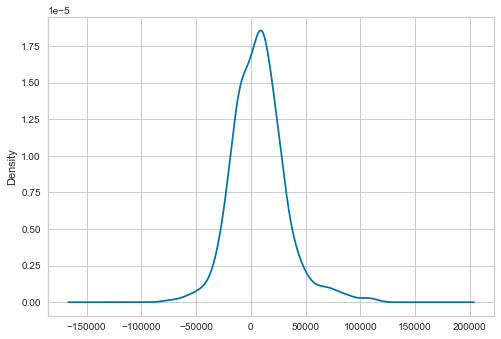

In [75]:
target.plot.kde()

<AxesSubplot:ylabel='Density'>

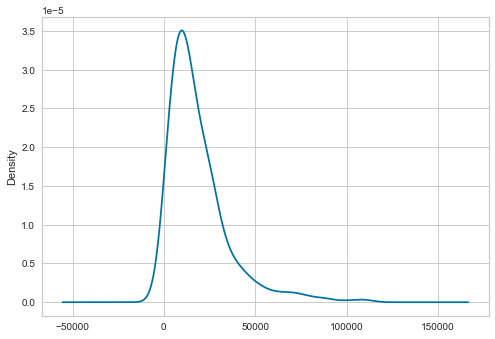

In [76]:
target.abs().plot.kde()

In [77]:
target.quantile(np.linspace(0, 1, num=11)).values

array([-74184. , -18878. , -11484.8,  -5990. ,   1677. ,   7024. ,
        11145. ,  16279.4,  23573.6,  34542. , 111047. ])

In [78]:
[str(x) for x in target.quantile(np.linspace(0, 1, num=11)).values]

['-74184.0',
 '-18877.999999999996',
 '-11484.8',
 '-5989.999999999995',
 '1677.0000000000023',
 '7024.0',
 '11145.000000000002',
 '16279.4',
 '23573.60000000001',
 '34542.0',
 '111047.0']

In [79]:
target

0     -16146.0
1        239.0
2      11577.0
3      -7310.0
4      17148.0
        ...   
504    13428.0
505   -25954.0
506   -18673.0
507   -12744.0
508    -9309.0
Name: dem_net_vote, Length: 509, dtype: float64

In [176]:
target

bins = target.quantile(np.linspace(0, 1, num=4)).values
names = [str(x) for x in target.quantile(np.linspace(0, 1, num=4)).values[1:]]

target1 = pd.cut(target, bins, labels=names)

# df = pd.DataFrame({'Age': [99, 53, 71, 84, 84],
#                    'Age_units': ['Y', 'Y', 'Y', 'Y', 'Y']})

# bins = [0, 2, 18, 35, 65]
# names = ['<2', '2-18', '18-35', '35-65', '65+']

# d = dict(enumerate(names, 1))

# np.vectorize(d.get)(np.digitize(target, bins))

In [268]:
flips.describe()

,year,dem_net_vote,dem_incumbent,rep_incumbent,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,...,"$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,2016.00,995.70,0.35,0.65,212797.65,104117.45,108680.20,164802.65,16772.45,695.25,...,20068.40,16886.85,19286.40,15954.90,7403.35,34621.40,34807.45,132262.00,33958.05,3.67
std,2.51,6181.20,0.49,0.49,93773.63,46314.06,47483.07,62240.26,14560.19,444.53,...,8458.82,7150.54,7884.47,6223.84,3046.59,22233.43,15606.94,57891.18,15841.32,4.19
min,2012.00,-16250.00,0.00,0.00,127020.00,61667.00,65279.00,93653.00,2606.00,146.00,...,9255.00,7789.00,8596.00,7623.00,3621.00,9013.00,18056.00,79124.00,13824.00,-2.40
25%,2014.00,-1038.75,0.00,0.00,129956.75,63134.50,66596.25,108247.50,5375.25,403.25,...,12446.75,10016.50,12623.50,10995.50,4801.00,14818.75,20321.50,81423.00,21615.25,-0.20
50%,2018.00,1539.50,0.00,1.00,133536.00,65376.50,69024.00,123869.00,11840.00,580.00,...,16191.50,13327.50,15924.00,11831.00,5642.00,29844.00,24965.50,83608.50,25141.50,7.30
75%,2018.00,3550.50,1.00,1.00,310884.25,153579.50,157288.25,225819.50,27327.25,998.50,...,29190.00,23937.00,26750.00,22763.75,10621.50,45715.75,50787.75,193793.50,47225.50,7.30
max,2018.00,12202.00,1.00,1.00,325605.00,159822.00,165783.00,252070.00,51036.00,1832.00,...,33433.00,27710.00,31939.00,24476.00,11633.00,79148.00,54653.00,201231.00,58993.00,7.30


In [284]:
pd.concat([sample, flips]).drop_duplicates(keep=False).describe()

,year,dem_net_vote,dem_incumbent,rep_incumbent,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,...,"$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot
count,489.00,489.00,489.0,489.00,489.00,489.00,489.00,489.00,489.00,489.00,...,489.00,489.00,489.00,489.00,489.00,489.00,489.00,489.00,489.00,489.00
mean,2014.94,7628.36,0.5,0.31,183932.98,89113.45,94819.53,124422.42,24753.89,633.45,...,18711.20,14766.20,16698.27,12927.80,5833.92,24334.76,29137.75,116811.45,27205.51,1.28
std,2.25,24653.57,0.5,0.46,82664.56,40196.58,42678.07,74102.40,32411.11,557.63,...,9092.38,7173.98,8056.39,6415.36,3132.10,19124.71,14093.20,52936.92,13625.83,3.59
min,2012.00,-74184.00,0.0,0.00,116490.00,51800.00,60945.00,8019.00,1211.00,57.00,...,6140.00,5489.00,6403.00,2677.00,749.00,1379.00,7261.00,66255.00,7980.00,-2.40
25%,2012.00,-9003.00,0.0,0.00,128864.00,62192.00,66062.00,80985.00,5430.00,282.00,...,12165.00,9360.00,10654.00,8570.00,3775.00,11029.00,20238.00,80677.00,17936.00,-0.20
50%,2014.00,7560.00,0.0,0.00,132970.00,65356.00,68393.00,109754.00,11672.00,463.00,...,14781.00,11582.00,13312.00,10284.00,4734.00,19987.00,22465.00,84409.00,21776.00,-0.20
75%,2016.00,20687.00,1.0,1.00,292869.00,142091.00,148757.00,149689.00,32015.00,803.00,...,26557.00,21024.00,23699.00,19018.00,7849.00,31316.00,42975.00,181767.00,37260.00,0.60
max,2018.00,111047.00,1.0,1.00,344634.00,165659.00,184540.00,282278.00,208441.00,4315.00,...,45878.00,32062.00,36058.00,28859.00,16926.00,137494.00,63969.00,250921.00,64157.00,7.30


In [270]:
target1 = []

for value in target:
    if value < -3550:
        target1.append(-1)
    elif value > 3550:
        target1.append(1)
    else:
        target1.append(0)

In [180]:
target1 = ['{:.0f}'.format(x) for x in target1]

In [274]:
pd.Series(target1).value_counts()

 1    283
-1    171
 0     55
dtype: int64

In [88]:
class ModelRunner:
    """
    For evaluating a pipeline or series of pipelines for their effectiveness at predicting the target in this sentiment analysis.
    
    ...
    Attributes
    ----------
    model : tuple or list
        the first index is expected to be a dictionary with the names of the classifier and transformer being used for the pipeline being passed in. the second index should be the pipeline object
    neutral : bool
        whether neutral sentiment is a possible target, i.e. is this a multiclass problem
    data : pandas.DataFrame or pandas.Series
        the tweets used to predict the target, usually referred to as X
    target : pandas.Series
        the feature being predicted, usually referred to as y
    
    
    Methods
    -------
    run_model():
        Evaluates the provided pipelines and returns statistical scores, the ROC-AUC graph, a bar graph containing the 20 most influential words, as well as a bar graph displaying the prevalence of those words in factually positive and negative tweets.
    """
    
    
    def __init__(self, model, neutral, data, target):
        self.neutral = neutral
        self.classifier_name = model[0]['classifier']
        self.transformer_name = model[0]['transformer']
        self.clf = model[1]
        self.data = data
        self.target = target
        self.random_state = 42
        self.score = {}
        self.impts = None

#         train test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data, self.target, random_state = self.random_state)


    def __evaluate(self, output = False):


        #     grab predictions
        train_preds = self.clf.predict(self.X_train)
        val_preds = self.clf.predict(self.X_test)
        
#         get predictions or probabilities depending on which model is being run
        
        try:
            train_out = self.clf.predict_proba(self.X_train)
            val_out = self.clf.predict_proba(self.X_test)
        except AttributeError:
            train_out = self.clf.predict(self.X_train)
            val_out = self.clf.predict(self.X_test)

        ac = accuracy_score(self.y_train, train_preds)
    
    
#         added parameters are necessary for multiclass problems
        if self.neutral:
            f1 = f1_score(self.y_train, train_preds, pos_label='Positive emotion', average='macro')
            ras = roc_auc_score(self.y_train, train_out, multi_class='ovo')
            pr = precision_score(self.y_train, train_preds, pos_label='Positive emotion', average='macro')
        else:

            f1 = f1_score(self.y_train, train_preds, pos_label='Positive emotion')
            ras = roc_auc_score(self.y_train, train_out[:,1])
            pr = precision_score(self.y_train, train_preds, pos_label='Positive emotion')
                

#           tracking scores and their associated models

#         packaging the scores for later direct comparison
        self.score[str(self.clf['scaler']) + ' ' + str(self.clf['classifier'])] = {'train': {'f1' : f1,
                                                                               'roc-auc' : ras,
                                                                               'ac' : ac,
                                                                               'pr' : pr
                                                                              }}
        if output:
            print('Train Scores')
            print('------------')
            print(f'Accuracy: {ac}')
            print(f'F1 Score: {f1}')
            if type(train_out) == np.ndarray:
                print(f'ROC-AUC: {ras}')
            print(f'Precision: {pr}')

#         get statistic scores            
        ac = accuracy_score(self.y_test, val_preds)

        if self.neutral:
            f1 = f1_score(self.y_test, val_preds, average='macro')
#             ras = roc_auc_score(self.y_test, val_out, multi_class='ovo')
            pr = precision_score(self.y_test, val_preds, average='macro')
        else:
            f1 = f1_score(self.y_test, val_preds, pos_label='Positive emotion')
#             ras = roc_auc_score(self.y_test, val_out[:,1])
            pr = precision_score(self.y_test, val_preds, pos_label='Positive emotion')

#         packaging the scores for later direct comparison
        self.score[str(self.clf['scaler']) + ' ' + str(self.clf['classifier'])]['test'] = {'f1' : f1,
#                                                                                        'roc-auc' : ras,
                                                                                       'ac' : ac,
                                                                                       'pr' : pr
                                                                                      }
                
        if output:
            print('-----------------------------------')
            print('Test Scores')
            print('-----------')
            print(f'Accuracy: {ac}')
            print(f'F1 Score: {f1}')
#             if type(val_out) == np.ndarray:
#                 print(f'ROC-AUC: {ras}')
            print(f'Precision: {pr}')

        
            plot_confusion_matrix(self.clf, self.X_test, self.y_test, values_format=',.5g')
            plt.show()


    def run_model(self):
#         fits the data to the pipeline
        self.clf.fit(self.X_train, self.y_train)
        self.__evaluate(output=True)
        
#         ROC_AUC graph imported specifically for multiclass problems
#         visualizer = ROCAUC(self.clf, classes = self.y_train.unique())

        # Fitting to the training data first then scoring with the test data
        
#         visualizer.fit(self.X_train, self.y_train)
#         visualizer.score(self.X_test, self.y_test)
#         visualizer.show()

        try:
            importances = sorted(list(zip(self.clf[self.classifier_name].feature_importances_, self.X_test.columns)))
        except AttributeError:
            importances = sorted(list(zip(self.clf[self.classifier_name].coef_[0], self.X_test.columns)))
        

        self.impts = pd.DataFrame(importances, columns=['impt', 'feat'])
        self.impts = self.impts.set_index('feat')
        self.impts = self.impts.sort_values(['impt'], ascending=False)
#         graph 20 most impactful words to given model
        self.impts.iloc[0:20].plot(kind='barh')
        plt.show()

In [89]:
import warnings
warnings.filterwarnings('ignore')

target_encoder = Pipeline(steps=[
    ('freq_enc', ce.target_encoder.TargetEncoder()),
#     ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
    
])

preprocessor = ColumnTransformer(
    transformers=[
#         ('num', num_transformer, num_cols),
#         ('ohe', ohe_transformer, cols_to_ohe),
        ('target', target_encoder, ['district'])
    ])

models = []
# testing 3 different scalers
# using with_mean=False and with_centering=False because tfidf Vectorizer creates a sparse matrix
for scaler in [MaxAbsScaler(), StandardScaler(), RobustScaler()]:

#     models = [({'classifier': 'lr', 'transformer': 'tfidfv'}, lr),
#               ({'classifier': 'Tree', 'transformer': 'tfidfv'}, tree),
#               ({'classifier': 'RandomForest', 'transformer': 'tfidfv'}, rf)
#              ]
    
    search_models = [LogisticRegression(random_state=42),
                     DecisionTreeClassifier(random_state=42),
                    RandomForestClassifier(random_state=42)
                    ]
    
    search_space = [{ 'max_iter': [100, 1000, 5000],
                      'class_weight': ['balanced', None],
                      'penalty': ['l1', 'l2'],
                      'C': np.linspace(0, 100, 8),
                      'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']
                          },
                   {
                       'criterion': ['gini', 'entropy'],
                       'splitter': ['best', 'random'],
                       'max_depth': [10, 50, 100],
#                        according to towardsdatascience.com, ideal split is between 1 and 40
                       'min_samples_split': [2, 20, 40],
#                        Given the 5827 unique words it'll be helpful to limit features for computation time
                       'max_features': ['sqrt', 'log2']
                   },
                   {
                       'criterion': ['gini', 'entropy'],                       
                       'bootstrap': [True, False],
                       'max_depth': [10, 50, 100],
                       'max_features': ['auto', 'sqrt'],
                       'min_samples_split': [2, 20, 40],
                       'n_estimators': [10, 100, 1000]
                   }]

    for model, params in zip(search_models, search_space):
        grid = RandomizedSearchCV(model, params, scoring='accuracy', random_state=42)

        pipe = Pipeline([
#             ('preprocessor', preprocessor),
                         ('scaler', scaler),
                    ('classifier', grid)])

        pipe.fit(data.drop(['district'], axis=1), target1)

        print(grid.best_params_)
    
        estimator = model.set_params(**grid.best_params_)

        pipe = Pipeline([
#             ('preprocessor', preprocessor),
                        ('scaler', scaler),
                        ('classifier', estimator)])
        
#         keeping a copy of all 9 "best" models for comparison
        models.append(({'classifier': 'classifier', 'transformer': pipe.steps[0][0]}, pipe))

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': None, 'C': 100.0}
{'splitter': 'best', 'min_samples_split': 40, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
{'n_estimators': 10, 'min_samples_split': 40, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy', 'bootstrap': False}
{'solver': 'saga', 'penalty': 'l2', 'max_iter': 5000, 'class_weight': None, 'C': 57.142857142857146}
{'splitter': 'best', 'min_samples_split': 40, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
{'n_estimators': 10, 'min_samples_split': 40, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy', 'bootstrap': False}
{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'class_weight': 'balanced', 'C': 71.42857142857143}
{'splitter': 'best', 'min_samples_split': 40, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
{'n_estimators': 10, 'min_samples_split': 40, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy', 

LogisticRegression(C=100.0, max_iter=1000, random_state=42, solver='newton-cg')
Train Scores
------------
Accuracy: 0.9973753280839895
F1 Score: 0.9982363315696648
ROC-AUC: 1.0
Precision: 0.9986772486772487
-----------------------------------
Test Scores
-----------
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0


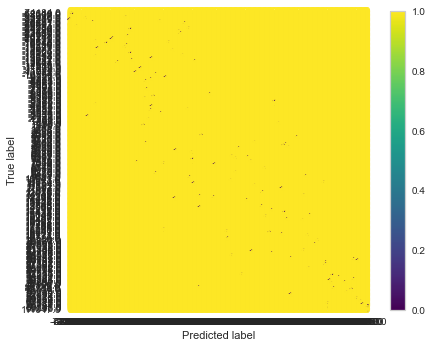

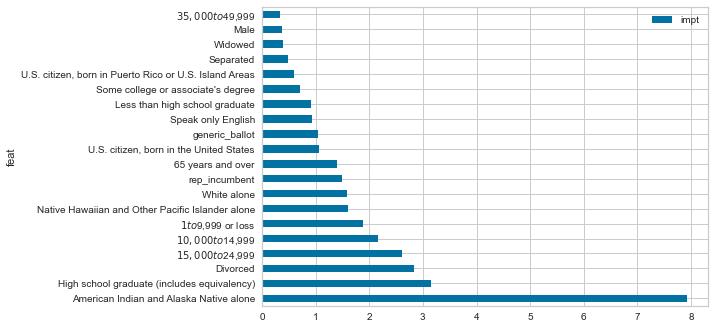

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=40,
                       random_state=42)
Train Scores
------------
Accuracy: 0.05511811023622047
F1 Score: 0.040933154151544957
ROC-AUC: 0.788970288970289
Precision: 0.0403958539096945
-----------------------------------
Test Scores
-----------
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0


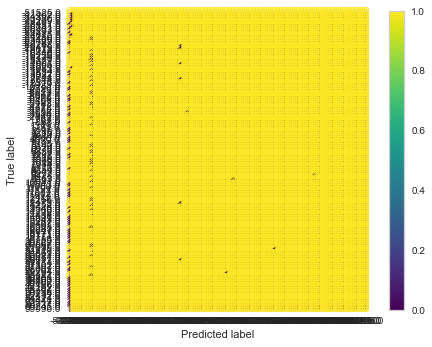

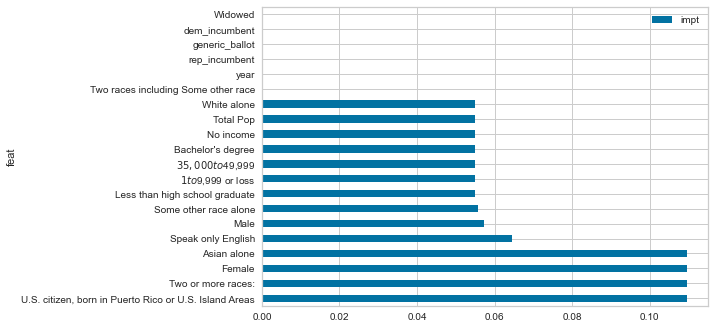

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       max_features='sqrt', min_samples_split=40,
                       n_estimators=10, random_state=42)
Train Scores
------------
Accuracy: 0.9212598425196851
F1 Score: 0.9074197407530741
ROC-AUC: 0.9999052671466464
Precision: 0.9023034578590133
-----------------------------------
Test Scores
-----------
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0


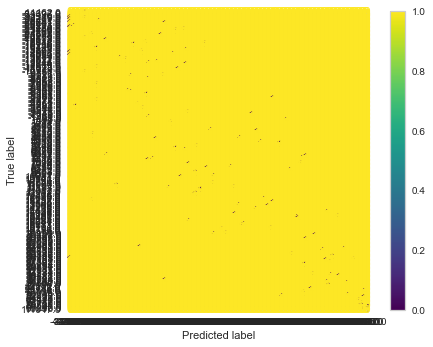

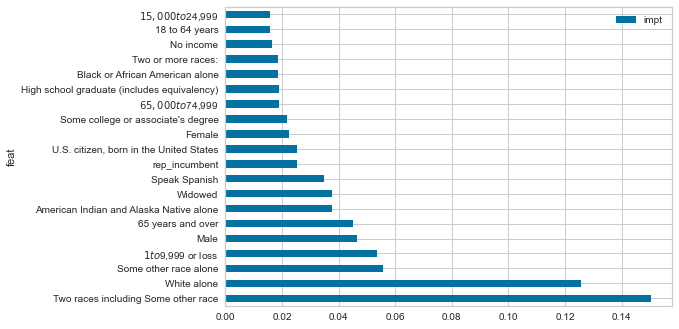

LogisticRegression(C=57.142857142857146, max_iter=5000, random_state=42,
                   solver='saga')
Train Scores
------------
Accuracy: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Precision: 1.0
-----------------------------------
Test Scores
-----------
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0


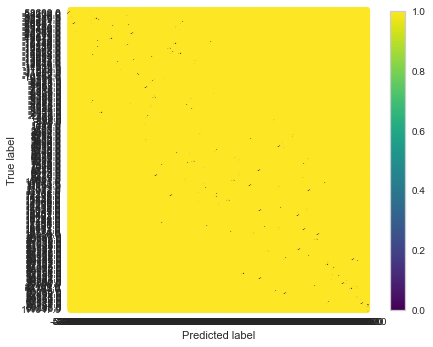

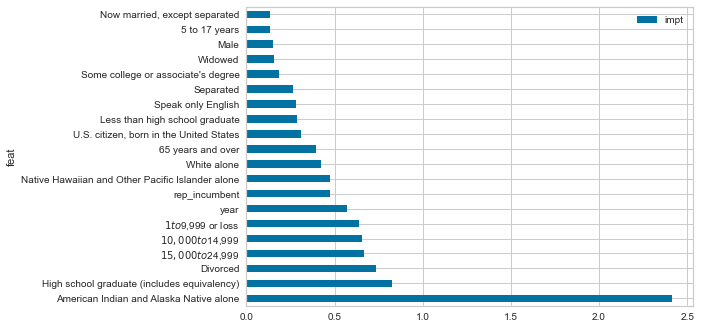

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=40,
                       random_state=42)
Train Scores
------------
Accuracy: 0.05511811023622047
F1 Score: 0.040933154151544957
ROC-AUC: 0.788970288970289
Precision: 0.0403958539096945
-----------------------------------
Test Scores
-----------
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0


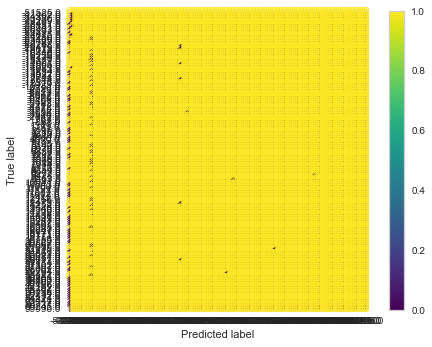

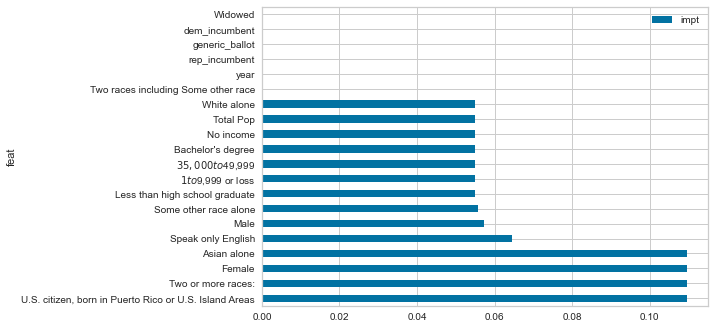

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       max_features='sqrt', min_samples_split=40,
                       n_estimators=10, random_state=42)
Train Scores
------------
Accuracy: 0.9212598425196851
F1 Score: 0.9074197407530741
ROC-AUC: 0.9999052671466464
Precision: 0.9023034578590133
-----------------------------------
Test Scores
-----------
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0


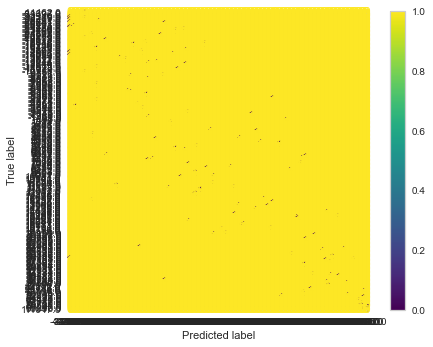

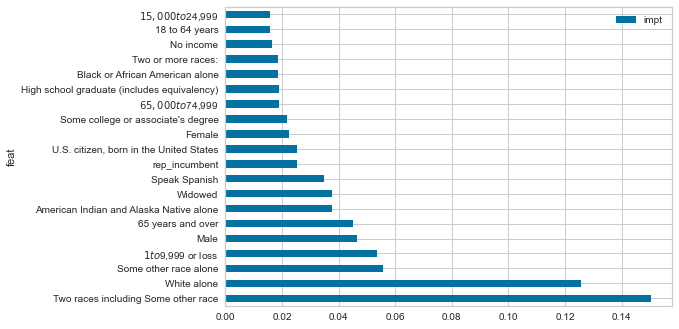

LogisticRegression(C=71.42857142857143, class_weight='balanced', max_iter=1000,
                   penalty='l1', random_state=42, solver='saga')
Train Scores
------------
Accuracy: 0.9973753280839895
F1 Score: 0.9982363315696648
ROC-AUC: 1.0
Precision: 0.9986772486772487
-----------------------------------
Test Scores
-----------
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0


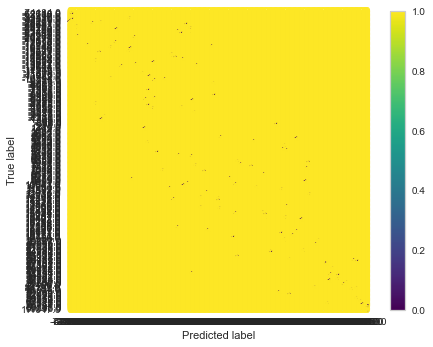

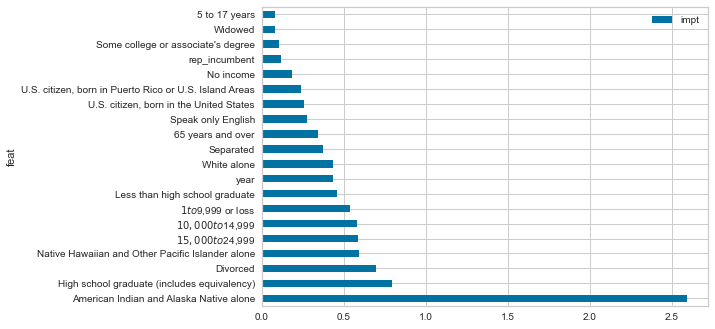

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=40,
                       random_state=42)
Train Scores
------------
Accuracy: 0.05511811023622047
F1 Score: 0.040933154151544957
ROC-AUC: 0.788970288970289
Precision: 0.0403958539096945
-----------------------------------
Test Scores
-----------
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0


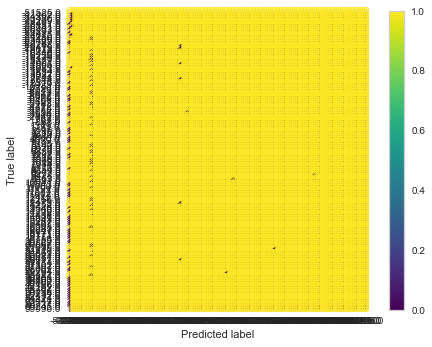

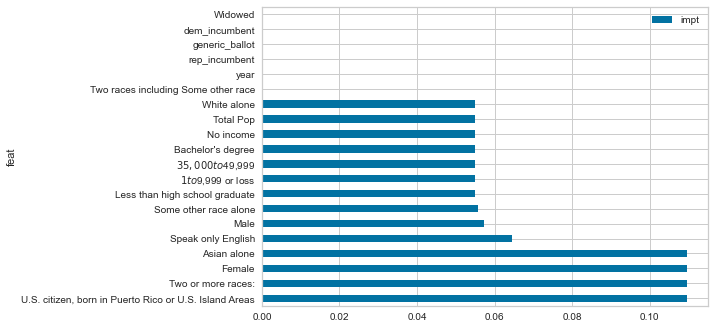

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       max_features='sqrt', min_samples_split=40,
                       n_estimators=10, random_state=42)
Train Scores
------------
Accuracy: 0.9212598425196851
F1 Score: 0.9074197407530741
ROC-AUC: 0.9999052671466464
Precision: 0.9023034578590133
-----------------------------------
Test Scores
-----------
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0


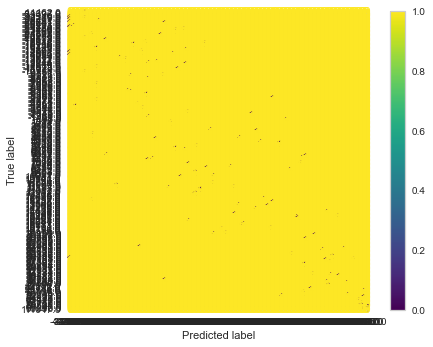

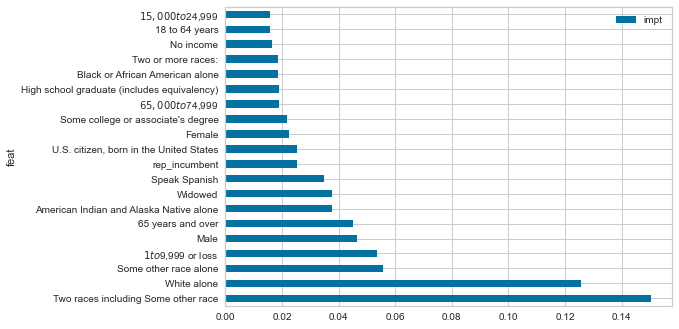

In [90]:
# collecting the statistical scores for direct comparison
score = {}

for each in models:
    print(each[1]['classifier'])
    mr = ModelRunner(model = each, neutral = True, data = data.drop(['district'], axis=1), target = target)
    mr.run_model()
    for key, value in mr.score.items():
        score[key] = value

In [91]:
mr.X_test.shape

(128, 43)

In [92]:
mr.y_test.shape

(128,)

In [93]:
visualizer

NameError: name 'visualizer' is not defined

In [285]:
lr = LinearRegression()

pipe = Pipeline([
            ('preprocessor', preprocessor),
                         ('scaler', scaler),
                    ('lr', lr)])

In [311]:
X_train, X_test, y_train, y_test = train_test_split(data, pd.Series(target1), random_state = 42)


In [312]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('target',
                                                  Pipeline(steps=[('freq_enc',
                                                                   TargetEncoder())]),
                                                  ['district'])])),
                ('scaler', RobustScaler()),
                ('tree', DecisionTreeClassifier())])

In [313]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

In [314]:
r2_score(y_train, train_preds)

0.6059294686150232

In [315]:
r2_score(y_test, test_preds)

-0.008928571428571397

In [291]:
# accuracy_score, f1_score, roc_auc_score, plot_confusion_matrix, precision_score, plot_roc_curve, make_scorer, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

In [292]:
# can't run accuracy score on linear model

In [293]:
mean_absolute_error(y_train, train_preds)

0.33135674190406716

In [294]:
mean_squared_error(y_train, train_preds)

0.2273969978292972

In [295]:
mean_absolute_error(y_test, test_preds)

0.5993767376953695

In [296]:
mean_squared_error(y_test, test_preds)

0.5607269362327736

# ----------------------------------

In [297]:
tree = DecisionTreeClassifier()

pipe = Pipeline([
            ('preprocessor', preprocessor),
                         ('scaler', scaler),
                    ('tree', tree)])

In [298]:
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

train_out = pipe.predict_proba(X_train)
test_out = pipe.predict_proba(X_test)

In [299]:
# r2 not as helpful in non-linear models

In [300]:
accuracy_score(y_train, train_preds)

0.8451443569553806

In [301]:
accuracy_score(y_test, test_preds)

0.703125

In [302]:
f1_score(y_train, train_preds, average='macro')

0.7429206203391008

In [303]:
f1_score(y_test, test_preds, average='macro')

0.47417153996101363

In [304]:
roc_auc_score(y_train, train_out, multi_class='ovo')

0.9330333669746724

In [305]:
roc_auc_score(y_test, test_out, multi_class='ovo', labels=[-1, 0, 1])

0.712719298245614

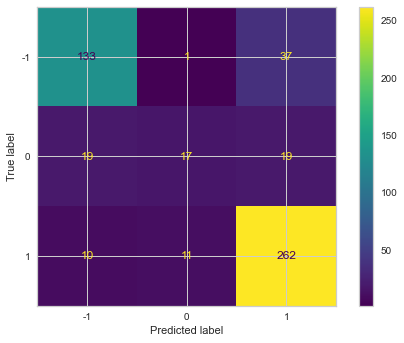

In [306]:
plot_confusion_matrix(pipe, data, target1)

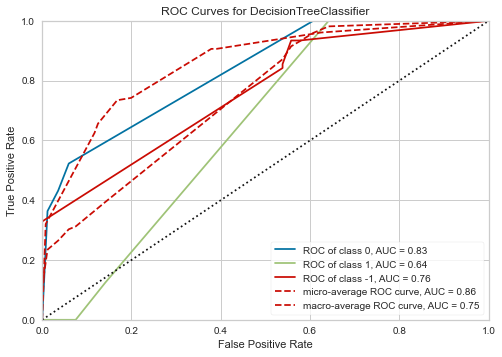

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [316]:
visualizer = ROCAUC(pipe, classes = y_train.unique())

        # Fitting to the training data first then scoring with the test data
        
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [322]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

          -1       0.82      0.87      0.84       127
           0       0.71      0.36      0.48        47
           1       0.87      0.94      0.91       207

    accuracy                           0.85       381
   macro avg       0.80      0.72      0.74       381
weighted avg       0.84      0.85      0.83       381



In [321]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

          -1       0.82      0.52      0.64        44
           0       0.00      0.00      0.00         8
           1       0.71      0.88      0.78        76

    accuracy                           0.70       128
   macro avg       0.51      0.47      0.47       128
weighted avg       0.70      0.70      0.68       128



# --------------------------------

In [323]:
rf = RandomForestClassifier()

pipe = Pipeline([
            ('preprocessor', preprocessor),
                         ('scaler', scaler),
                    ('rf', rf)])

In [324]:
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

train_out = pipe.predict_proba(X_train)
test_out = pipe.predict_proba(X_test)

In [325]:
# r2 not as helpful in non-linear models

In [326]:
accuracy_score(y_train, train_preds)

0.8451443569553806

In [327]:
accuracy_score(y_test, test_preds)

0.6953125

In [328]:
f1_score(y_train, train_preds, average='macro')

0.7423914222963823

In [329]:
f1_score(y_test, test_preds, average='macro')

0.46626269243367174

In [330]:
roc_auc_score(y_train, train_out, multi_class='ovo')

0.9321536203287571

In [331]:
roc_auc_score(y_test, test_out, multi_class='ovo', labels=[-1, 0, 1])

0.7173793859649122

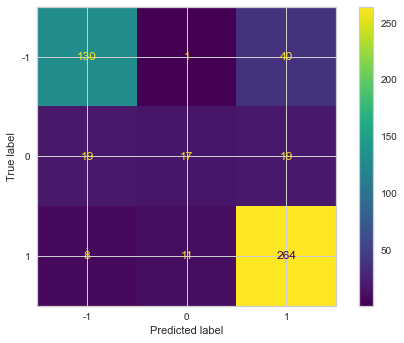

In [332]:
plot_confusion_matrix(pipe, data, target1)

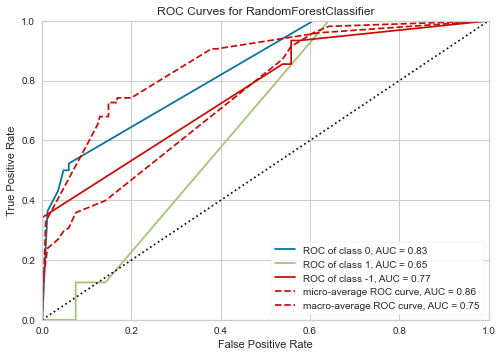

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [333]:
visualizer = ROCAUC(pipe, classes = y_train.unique())

        # Fitting to the training data first then scoring with the test data
        
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [334]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

          -1       0.83      0.85      0.84       127
           0       0.71      0.36      0.48        47
           1       0.87      0.95      0.91       207

    accuracy                           0.85       381
   macro avg       0.80      0.72      0.74       381
weighted avg       0.84      0.85      0.83       381



In [335]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

          -1       0.81      0.50      0.62        44
           0       0.00      0.00      0.00         8
           1       0.70      0.88      0.78        76

    accuracy                           0.70       128
   macro avg       0.50      0.46      0.47       128
weighted avg       0.69      0.70      0.68       128



# --------------------------

In [341]:
svc = SVC(probability=True)

pipe = Pipeline([
            ('preprocessor', preprocessor),
                         ('scaler', scaler),
                    ('svc', svc)])

In [342]:
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

train_out = pipe.predict_proba(X_train)
test_out = pipe.predict_proba(X_test)

In [343]:
# r2 not as helpful in non-linear models

In [344]:
accuracy_score(y_train, train_preds)

0.8188976377952756

In [345]:
accuracy_score(y_test, test_preds)

0.734375

In [346]:
f1_score(y_train, train_preds, average='macro')

0.5759604438176473

In [347]:
f1_score(y_test, test_preds, average='macro')

0.47775921063101773

In [348]:
roc_auc_score(y_train, train_out, multi_class='ovo')

0.7541247060429503

In [349]:
roc_auc_score(y_test, test_out, multi_class='ovo', labels=[-1, 0, 1])

0.6439892344497608

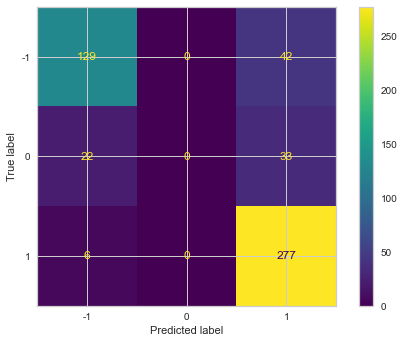

In [350]:
plot_confusion_matrix(pipe, data, target1)

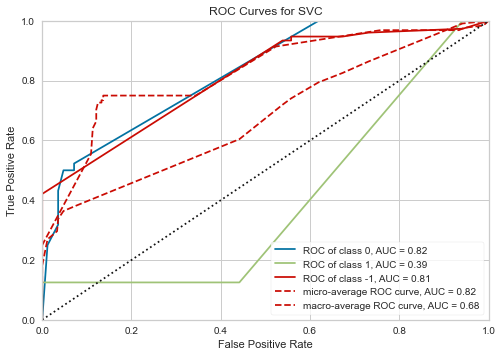

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [351]:
visualizer = ROCAUC(pipe, classes = y_train.unique())

        # Fitting to the training data first then scoring with the test data
        
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [352]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

          -1       0.82      0.84      0.83       127
           0       0.00      0.00      0.00        47
           1       0.82      0.99      0.90       207

    accuracy                           0.82       381
   macro avg       0.55      0.61      0.58       381
weighted avg       0.72      0.82      0.76       381



In [353]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

          -1       0.81      0.50      0.62        44
           0       0.00      0.00      0.00         8
           1       0.71      0.95      0.81        76

    accuracy                           0.73       128
   macro avg       0.51      0.48      0.48       128
weighted avg       0.70      0.73      0.70       128



# --------------------------

In [355]:
ada = AdaBoostClassifier()

pipe = Pipeline([
            ('preprocessor', preprocessor),
                         ('scaler', scaler),
                    ('ada', ada)])

In [356]:
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

train_out = pipe.predict_proba(X_train)
test_out = pipe.predict_proba(X_test)

In [357]:
# r2 not as helpful in non-linear models

In [358]:
accuracy_score(y_train, train_preds)

0.8451443569553806

In [359]:
accuracy_score(y_test, test_preds)

0.7265625

In [360]:
f1_score(y_train, train_preds, average='macro')

0.7146064863102563

In [361]:
f1_score(y_test, test_preds, average='macro')

0.47551216389244555

In [362]:
roc_auc_score(y_train, train_out, multi_class='ovo')

0.8181044899452323

In [363]:
roc_auc_score(y_test, test_out, multi_class='ovo', labels=[-1, 0, 1])

0.6647228867623604

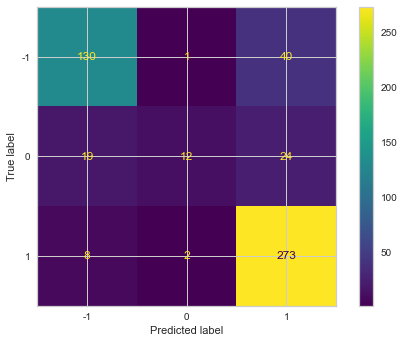

In [364]:
plot_confusion_matrix(pipe, data, target1)

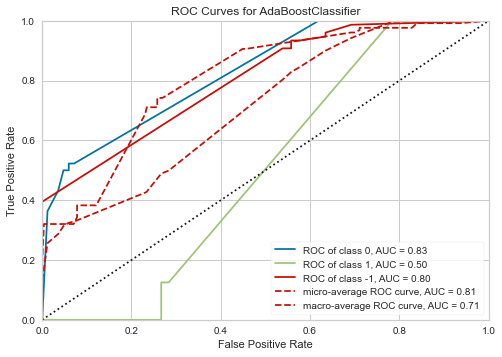

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [365]:
visualizer = ROCAUC(pipe, classes = y_train.unique())

        # Fitting to the training data first then scoring with the test data
        
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [366]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

          -1       0.83      0.85      0.84       127
           0       0.86      0.26      0.39        47
           1       0.85      0.98      0.91       207

    accuracy                           0.85       381
   macro avg       0.85      0.69      0.71       381
weighted avg       0.85      0.85      0.82       381



In [367]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

          -1       0.81      0.50      0.62        44
           0       0.00      0.00      0.00         8
           1       0.71      0.93      0.81        76

    accuracy                           0.73       128
   macro avg       0.51      0.48      0.48       128
weighted avg       0.70      0.73      0.69       128

